In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [46]:
df_ml = pd.read_csv('./artifacts/ml_search_results.csv')
df_cnn = pd.read_csv('./artifacts/cnn_models_results.csv')

In [47]:
# df_cnn.head(40)
cnn_BCICIV_I = df_cnn[df_cnn["dataset"] == 'BCICIV_I']
cnn_BCICIV_II = df_cnn[df_cnn["dataset"] == 'BCICIV_II']
cnn_eeg_mi = df_cnn[df_cnn["dataset"] == 'eeg-mi']

# CNN Models

## Dataset 1 - BCICIV_I

In [48]:
global_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
7,DeepConvNet,BCICIV_I,all,0.842857,0.551429,0.560000
11,ShallowConvNet,BCICIV_I,all,0.890000,0.560000,0.542857
20,EEGNet,BCICIV_I,all,0.774286,0.520000,0.505714


In [49]:
individual_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
0,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1a,1.00,0.86,0.80
1,EEGNet,BCICIV_I,BCICIV_calib_ds1a,0.91,0.72,0.72
2,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1f,1.00,0.70,0.72
4,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1g,0.99,0.68,0.64
5,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1c,1.00,0.42,0.58


In [50]:
def autolabel(rects, values, rot=0):
    for idx,rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.93*height,
                values[idx],
                ha='center', va='bottom', rotation=rot)

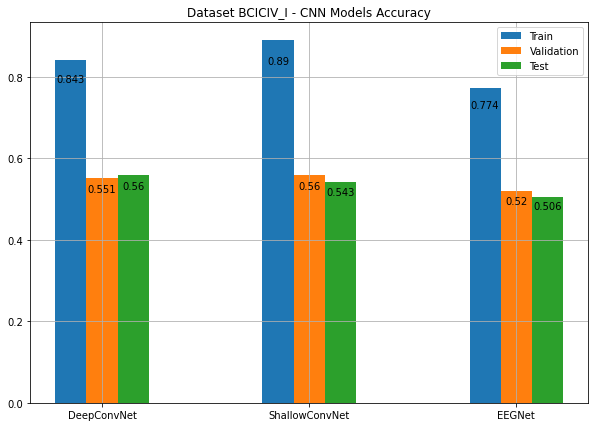

In [51]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

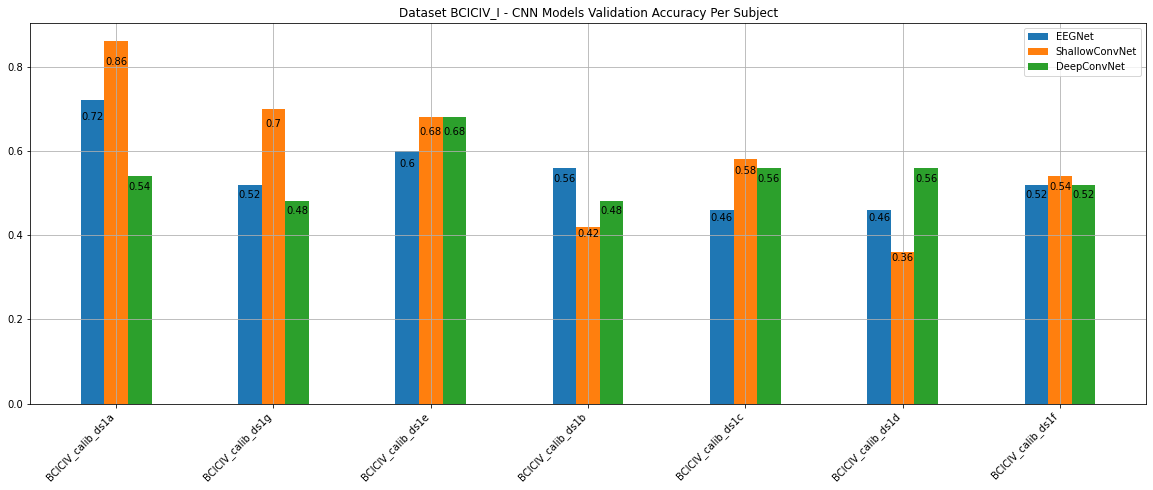

In [52]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

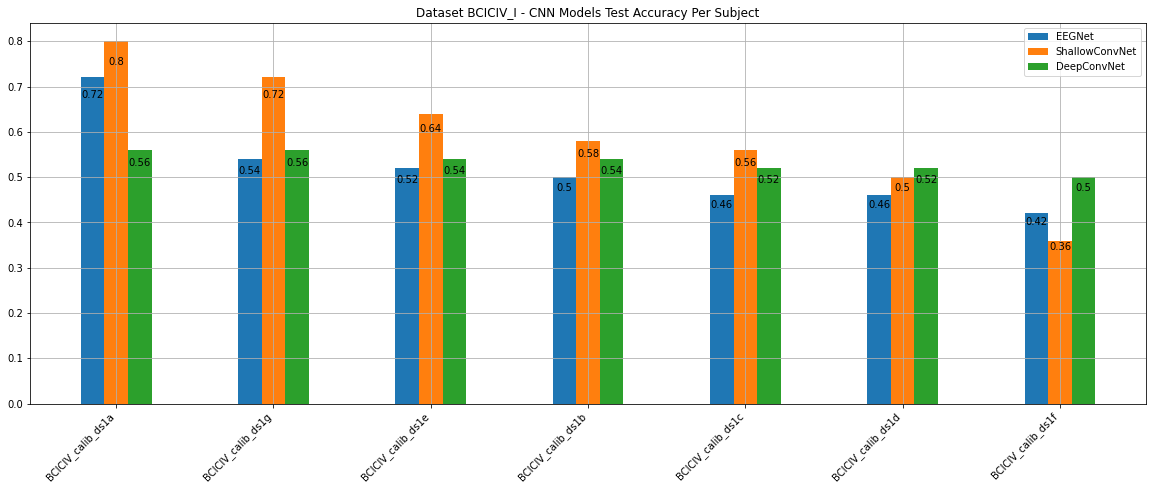

In [53]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 2 - BCICIV_II

In [54]:
global_performance_BCICIV_I = cnn_BCICIV_II[cnn_BCICIV_II["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
33,ShallowConvNet,BCICIV_II,all,0.574495,0.416667,0.401515
56,EEGNet,BCICIV_II,all,0.571970,0.328283,0.320707
148,DeepConvNet,BCICIV_II,all,0.816919,0.227273,0.214646


In [55]:
individual_performance_BCICIV_I = cnn_BCICIV_I[cnn_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
0,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1a,1.00,0.86,0.80
1,EEGNet,BCICIV_I,BCICIV_calib_ds1a,0.91,0.72,0.72
2,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1f,1.00,0.70,0.72
4,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1g,0.99,0.68,0.64
5,ShallowConvNet,BCICIV_I,BCICIV_calib_ds1c,1.00,0.42,0.58


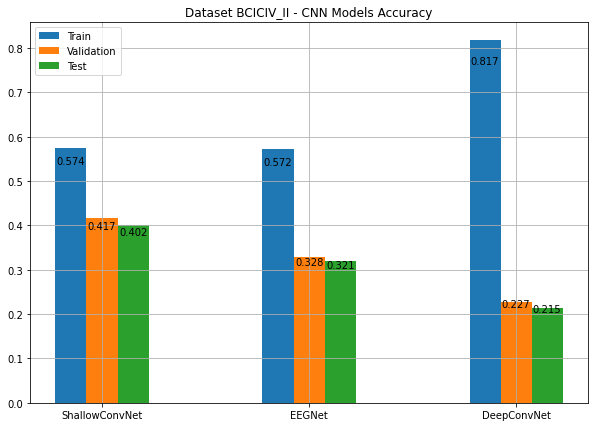

In [56]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))


ax.set_title('Dataset BCICIV_II - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

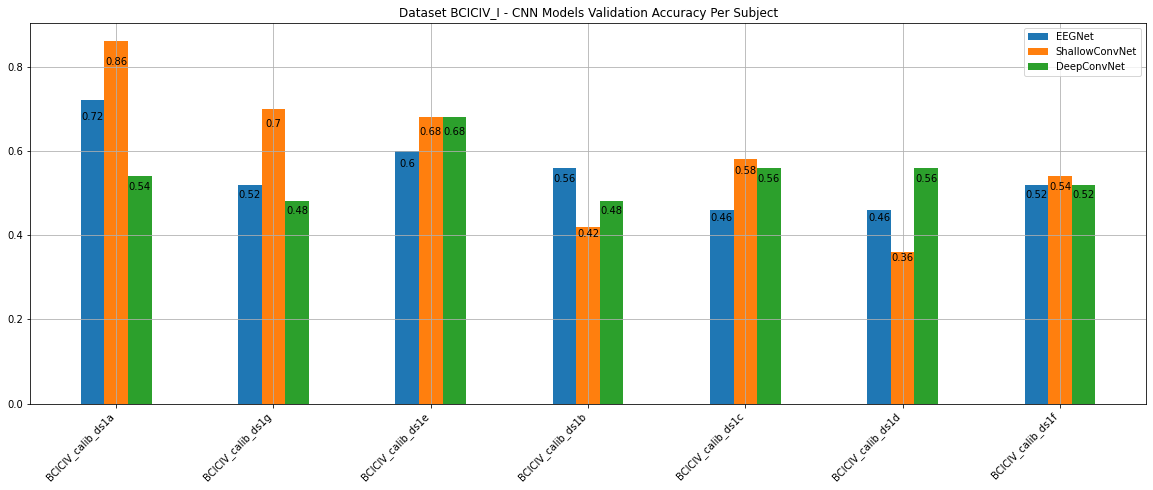

In [57]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

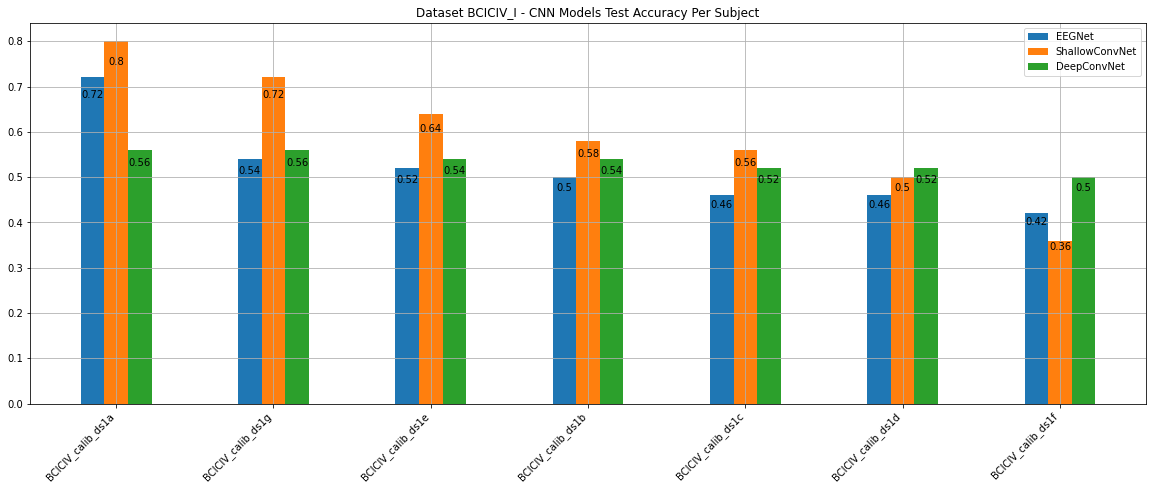

In [58]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 3 - eeg-mi

In [59]:
global_performance_BCICIV_I = cnn_eeg_mi[cnn_eeg_mi["subject"] == 'all']
global_performance_BCICIV_I

,model,dataset,subject,acc_train,acc_val,acc_test
41,EEGNet,eeg-mi,all,0.419728,0.380567,0.368421
83,ShallowConvNet,eeg-mi,all,0.478160,0.274725,0.274725
96,DeepConvNet,eeg-mi,all,0.485681,0.230191,0.248120


In [60]:
individual_performance_BCICIV_I = cnn_eeg_mi[cnn_eeg_mi["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model,dataset,subject,acc_train,acc_val,acc_test
25,ShallowConvNet,eeg-mi,S032,0.877778,0.488889,0.466667
28,ShallowConvNet,eeg-mi,S043,1.000000,0.333333,0.444444
29,ShallowConvNet,eeg-mi,S042,0.766667,0.311111,0.422222
30,EEGNet,eeg-mi,S028,0.955556,0.200000,0.422222
34,ShallowConvNet,eeg-mi,S008,0.977778,0.400000,0.400000


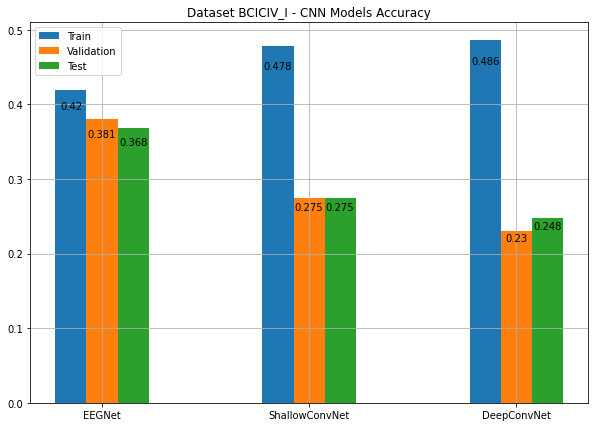

In [61]:
x = np.arange(len(global_performance_BCICIV_I['acc_val']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(10,7))
train = ax.bar(x - width, global_performance_BCICIV_I['acc_train'], width, label='Train')
validation = ax.bar(x, global_performance_BCICIV_I['acc_val'], width, label='Validation')
test = ax.bar(x + width, global_performance_BCICIV_I['acc_test'], width, label='Test')



autolabel(train,np.round(global_performance_BCICIV_I['acc_train'].values,3))
autolabel(validation,np.round(global_performance_BCICIV_I['acc_val'].values,3))
autolabel(test,np.round(global_performance_BCICIV_I['acc_test'].values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model'])
ax.grid()
ax.legend();

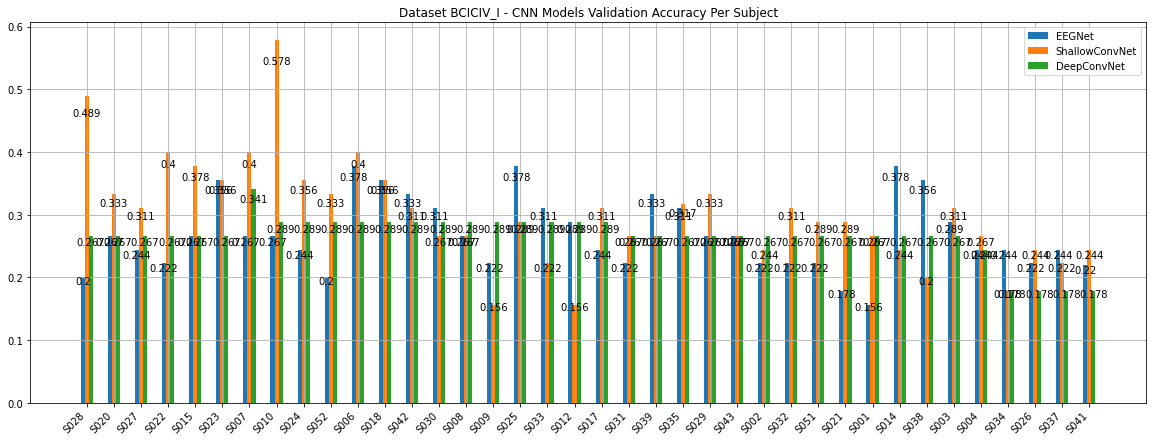

In [62]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

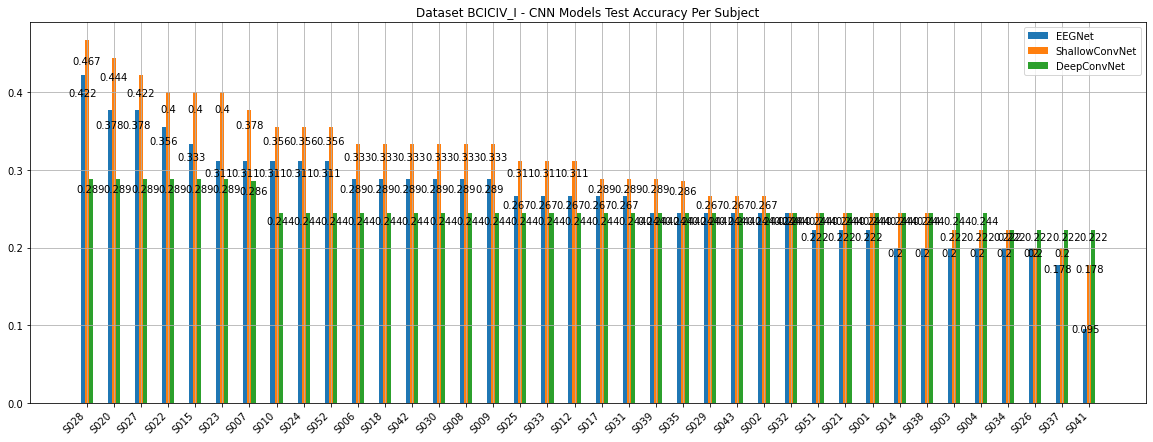

In [63]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

# Machine Learning Models

In [64]:
df_ml
ml_BCICIV_I = df_ml[df_ml["dataset"] == 'BCICIV_I']
ml_BCICIV_II = df_ml[df_ml["dataset"] == 'BCICIV_II']
ml_eeg_mi = df_ml[df_ml["dataset"] == 'eeg-mi']

## Dataset 1 - BCICIV_I

In [65]:
global_performance_BCICIV_I = ml_BCICIV_I[ml_BCICIV_I["subject"] == 'all']
global_performance_BCICIV_I.head()

,model_name,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_runtime,dataset,subject
38,bandpass -> PSD => SVM,0.562,0.646429,0.649176,0.646429,0.644793,0.646429,0.292857,0.295592,0:00:07.523281,BCICIV_I,all
66,Wavelet -> Time Domain Features => LDA,0.541,0.567857,0.568447,0.567857,0.566924,0.567857,0.135714,0.136303,0:00:02.265921,BCICIV_I,all
67,PSD -> Time Domain Features -> STD_Scaler => SVM,0.539,0.525000,0.525966,0.525000,0.520542,0.525000,0.050000,0.050957,0:00:00.678159,BCICIV_I,all
72,bandpass -> PSD => KNN,0.534,0.532143,0.532624,0.532143,0.530412,0.532143,0.064286,0.064765,0:00:00.269727,BCICIV_I,all
79,PSD -> Time Domain Features -> STD_Scaler => LDA,0.524,0.510714,0.510807,0.510714,0.509657,0.510714,0.021429,0.021522,0:00:02.238357,BCICIV_I,all


In [66]:
individual_performance_BCICIV_I = ml_BCICIV_I[ml_BCICIV_I["subject"] != 'all']
individual_performance_BCICIV_I.head()

,model_name,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_runtime,dataset,subject
1,Wavelet -> Time Domain Features => LDA,0.712,0.600,0.601010,0.600,0.598997,0.600,0.20,0.201008,0:00:00.420812,BCICIV_I,BCICIV_calib_ds1a
2,bandpass -> PSD => SVM,0.688,0.725,0.730179,0.725,0.723444,0.725,0.45,0.455150,0:00:00.084853,BCICIV_I,BCICIV_calib_ds1e
3,Wavelet -> Time Domain Features => SVM,0.688,0.675,0.679028,0.675,0.673162,0.675,0.35,0.354005,0:00:00.108586,BCICIV_I,BCICIV_calib_ds1a
4,bandpass -> PSD => SVM,0.681,0.550,0.550505,0.550,0.548872,0.550,0.10,0.100504,0:00:00.097866,BCICIV_I,BCICIV_calib_ds1g
5,bandpass -> PSD => SVM,0.675,0.600,0.601010,0.600,0.598997,0.600,0.20,0.201008,0:00:00.082227,BCICIV_I,BCICIV_calib_ds1f


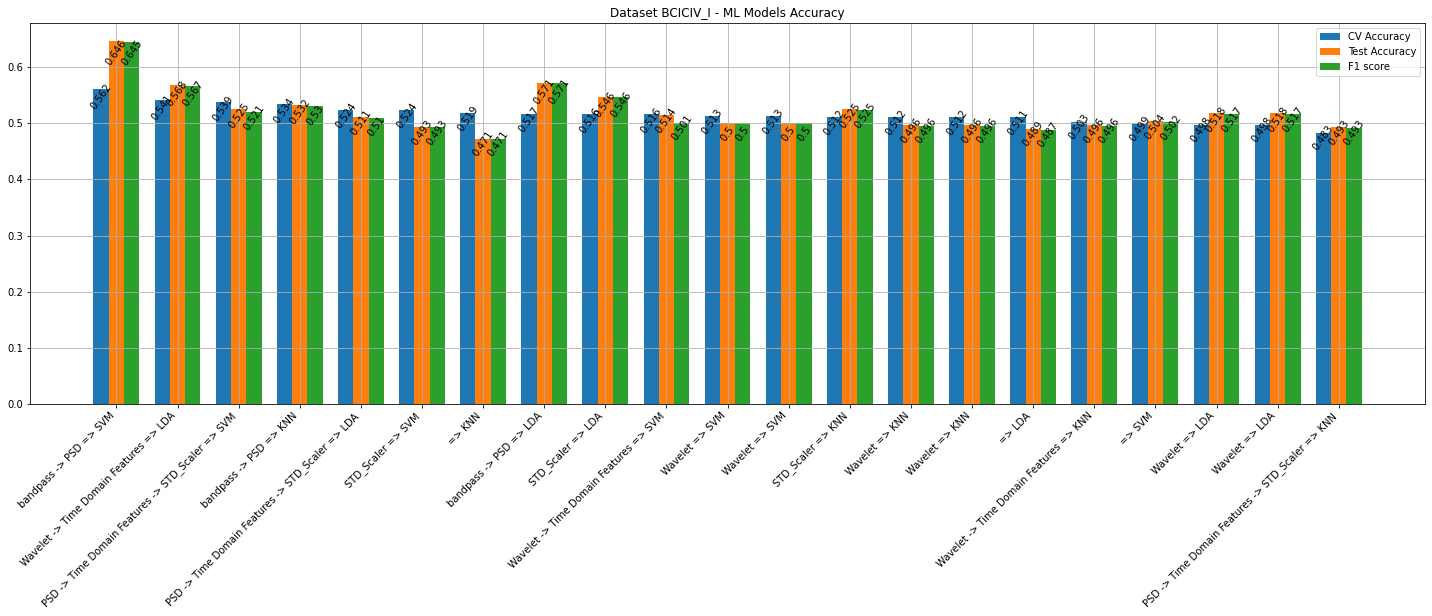

In [67]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)


ax.set_title('Dataset BCICIV_I - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

In [68]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

KeyError: 'acc_val'

In [ ]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 2 - BCICIV_II

In [ ]:
global_performance_BCICIV_I = ml_BCICIV_II[ml_BCICIV_II["subject"] == 'all']
global_performance_BCICIV_I.head()

In [ ]:
individual_performance_BCICIV_I = ml_BCICIV_II[ml_BCICIV_II["subject"] != 'all']
individual_performance_BCICIV_I.head()

In [ ]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)


ax.set_title('Dataset BCICIV_I - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

In [ ]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

In [ ]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

## Dataset 3 - eeg-mi

In [ ]:
global_performance_BCICIV_I = ml_eeg_mi[ml_eeg_mi["subject"] == 'all']
global_performance_BCICIV_I.head()

In [ ]:
individual_performance_BCICIV_I = ml_eeg_mi[ml_eeg_mi["subject"] != 'all']
individual_performance_BCICIV_I.head()

In [ ]:
x = np.arange(len(global_performance_BCICIV_I['cross_val_score']))  # pontos do eixo x
width = 0.25  # largura das barras

fig, ax = plt.subplots(figsize=(25,7))
train = ax.bar(x - width, global_performance_BCICIV_I['cross_val_score'], width, label='CV Accuracy')
validation = ax.bar(x, global_performance_BCICIV_I['Accuracy'], width, label='Test Accuracy')
test = ax.bar(x + width, global_performance_BCICIV_I['F1_score'], width, label='F1 score')



autolabel(train,np.round(global_performance_BCICIV_I['cross_val_score'].values,3),rot=55)
autolabel(validation,np.round(global_performance_BCICIV_I['Accuracy'].values,3),rot=55)
autolabel(test,np.round(global_performance_BCICIV_I['F1_score'].values,3),rot=55)


ax.set_title('Dataset BCICIV_I - ML Models Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(global_performance_BCICIV_I['model_name'], rotation = 45, ha="right")
ax.grid()
ax.legend();

In [ ]:
x = np.arange(len(individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_val'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Validation Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

In [ ]:
x = np.arange(len(individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']))  # pontos do eixo x
width = 0.15  # largura das barras

fig, ax = plt.subplots(figsize=(20,7))


eeg_net = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'EEGNet']
shallow_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'ShallowConvNet']
deep_conv = individual_performance_BCICIV_I['acc_test'][individual_performance_BCICIV_I['model'] == 'DeepConvNet']

eeg_net_plot = ax.bar(x - width, eeg_net, width, label='EEGNet')
shallow_conv_plot = ax.bar(x, shallow_conv, width, label='ShallowConvNet')
deep_conv_plot = ax.bar(x + width, deep_conv, width, label='DeepConvNet')



autolabel(eeg_net_plot,np.round(eeg_net.values,3))
autolabel(shallow_conv_plot,np.round(shallow_conv.values,3))
autolabel(deep_conv_plot,np.round(deep_conv.values,3))


ax.set_title('Dataset BCICIV_I - CNN Models Test Accuracy Per Subject')
ax.set_xticks(x)
ax.set_xticklabels(individual_performance_BCICIV_I['subject'][individual_performance_BCICIV_I['model'] == 'EEGNet'], rotation = 45, ha="right")
ax.grid()
ax.legend();

# Transformers Models

# Comparing Models